<a href="https://colab.research.google.com/github/subhajitmajumder/python_program/blob/master/Visualisation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
import seaborn as sns

import urllib.request
import json

# Make sns plots more readable
sns.set(color_codes=True)

# Plotting the composition of data

 ## Static Composition

### Pie Chart

In [127]:
p = sns.load_dataset('penguins')

In [128]:
p.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [129]:
# Grouping all species and count them.
c = p.groupby('species')['species'].count()

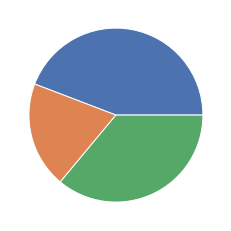

In [130]:
plt.pie(c)
plt.show()

In the above case there is no great informations to show.

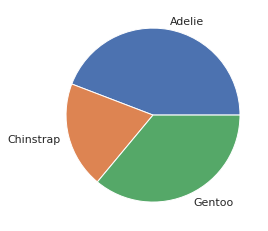

In [131]:
plt.pie(c, labels=c.index)
plt.show()

Now we can catch some informations but still we need some numeric values to get a proper picture.

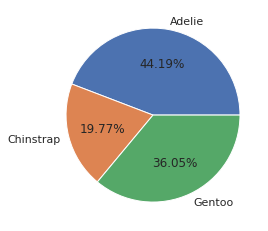

In [132]:
plt.pie(c, labels=c.index, autopct="%.2f%%")
plt.show()

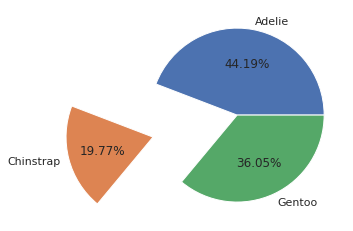

In [133]:
# We can cut smaller pieces to make the visualisation more realistic.
plt.pie(c, labels=c.index, autopct="%.2f%%",
        explode=[0,1,0])
plt.show()

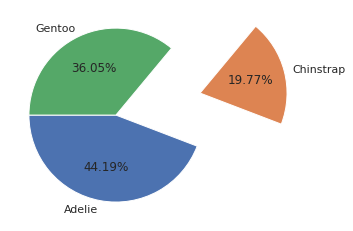

In [134]:
# We can cut smaller pieces to make the visualisation more realistic.
plt.pie(c, labels=c.index, autopct="%.2f%%",
        explode=[0,1,0], startangle=180)
plt.show()

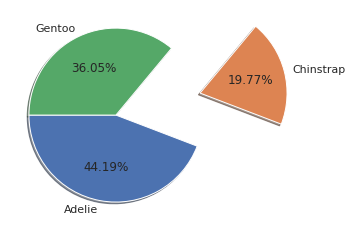

In [135]:
# We can cut smaller pieces to make the visualisation more realistic.
plt.pie(c, labels=c.index, autopct="%.2f%%",
        explode=[0,1,0], startangle=180, shadow=True)
plt.show()

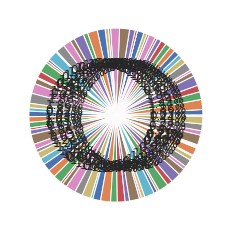

In [136]:
# Disadvantages of Pie Chart

plt.pie(np.random.randint(0, 10, 100), autopct="%.2f%%")
plt.show()

For this disadvantage, now we are moving towards another chart i.e. Donut Chart to represent the Pie Chart in a better way.

### Donut Chart

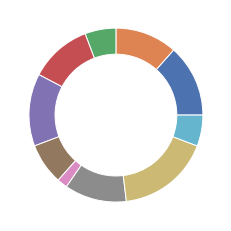

In [137]:
plt.pie(np.random.randint(0, 10, 10), wedgeprops=dict(width=0.3))
plt.show()

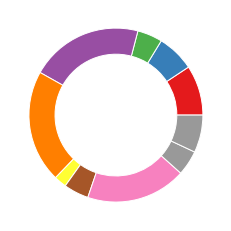

In [138]:
# We can use our own colormap.
cmap = plt.get_cmap('Set1')
my_colors = cmap(np.arange(10))

plt.pie(np.random.randint(0, 10, 10), 
        wedgeprops=dict(width=0.3),
        colors = my_colors)
plt.show()

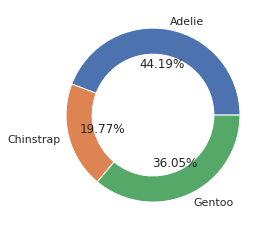

In [139]:
plt.pie(c, labels=c.index, 
        autopct="%.2f%%",
        wedgeprops=dict(width=0.3))
plt.show()

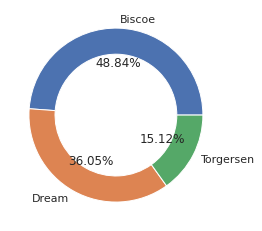

In [140]:
c_i = p.groupby('island')['island'].count()

plt.pie(c_i, labels=c_i.index, 
        autopct="%.2f%%",
        wedgeprops=dict(width=0.3))
plt.show()

-  How many penguins across species are there in individual islands?

For this question we need to count across two quantities. There is a function in pandas with which we can calculate multiple quantites

In [141]:
c = pd.crosstab(p.island, p.species)

In [142]:
c

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


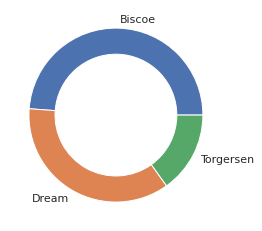

In [143]:
plt.pie(c.sum(axis=1), labels=c.index,
        radius = 1, wedgeprops = dict(width=0.3))
plt.show()

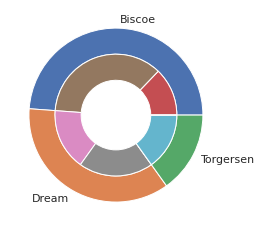

In [144]:
plt.pie(c.sum(axis=1), labels=c.index,
        radius = 1, wedgeprops = dict(width=0.3))
plt.pie(c.values.flatten(), radius = 0.7,
        wedgeprops = dict(width=0.3));

In [145]:
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([0, 4, 8]))
inner_colors = cmap(([1,2,3,5,6,7,9,10,11]))

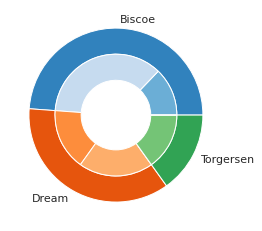

In [146]:
plt.pie(c.sum(axis=1), labels=c.index,
        radius = 1, wedgeprops = dict(width=0.3),
        colors=outer_colors)
plt.pie(c.values.flatten(), radius = 0.7,
        wedgeprops = dict(width=0.3),
        colors=inner_colors);

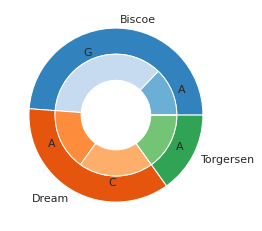

In [147]:
plt.pie(c.sum(axis=1), labels=c.index,
        radius = 1, wedgeprops = dict(width=0.3),
        colors=outer_colors)
plt.pie(c.values.flatten(), radius = 0.7,
        labels = ['A', '', 'G','A', 'C', '','A', '', ''],
        wedgeprops = dict(width=0.3),
        colors=inner_colors);

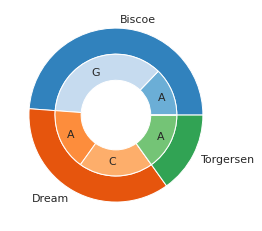

In [148]:
plt.pie(c.sum(axis=1), labels=c.index,
        radius = 1, wedgeprops = dict(width=0.3),
        colors=outer_colors)
plt.pie(c.values.flatten(), radius = 0.7,
        labels = ['A', '', 'G','A', 'C', '','A', '', ''],
        wedgeprops = dict(width=0.3),
        colors=inner_colors,
        labeldistance=0.75);

### Stacked Bar Plot

In [149]:
url = 'https://api.covid19india.org/states_daily.json'

urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [150]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [151]:
df_ = df.tail(3)
df_.drop('date', axis=1, inplace=True)
df_.set_index('status', inplace=True)
df_ =df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [152]:
df_.head()

status,Confirmed,Recovered,Deceased
an,31,2,0
ap,7813,3320,52
ar,70,36,0
as,1165,1294,1
br,2803,1688,11


<BarContainer object of 38 artists>

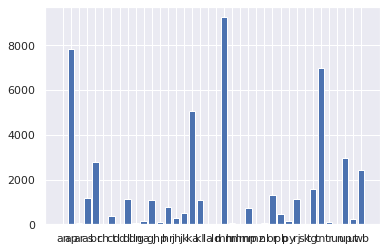

In [153]:
plt.bar(df_.index, df_.Confirmed)

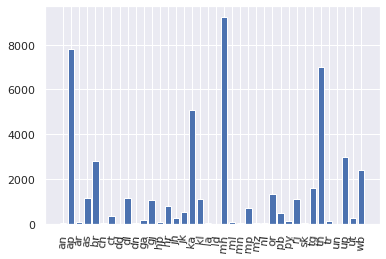

In [154]:
plt.bar(df_.index, df_.Confirmed)
plt.xticks(rotation = 85);

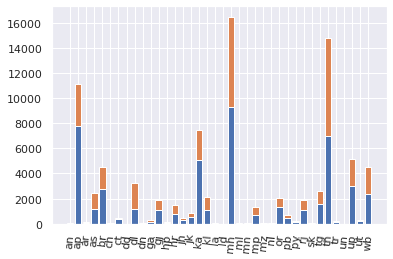

In [155]:
plt.bar(df_.index, df_.Confirmed)
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.xticks(rotation = 85);

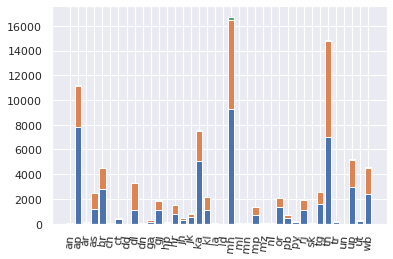

In [156]:
plt.bar(df_.index, df_.Confirmed)
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered)
plt.xticks(rotation = 85);

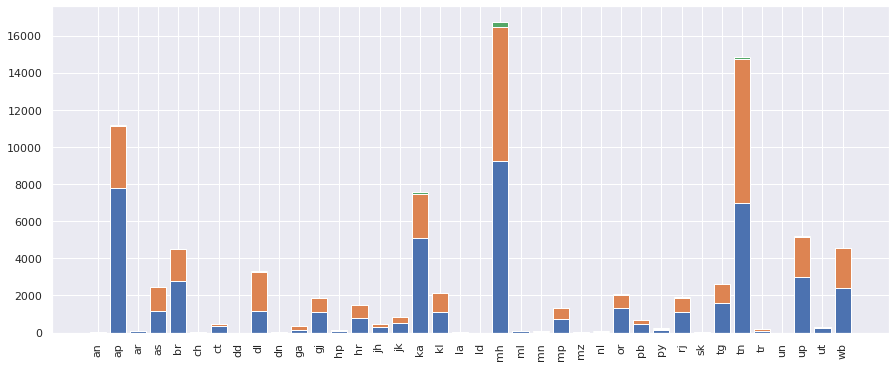

In [157]:
fig = plt.gcf();
fig.set_size_inches(15, 6)
plt.bar(df_.index, df_.Confirmed)
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered)
plt.xticks(rotation = 90);

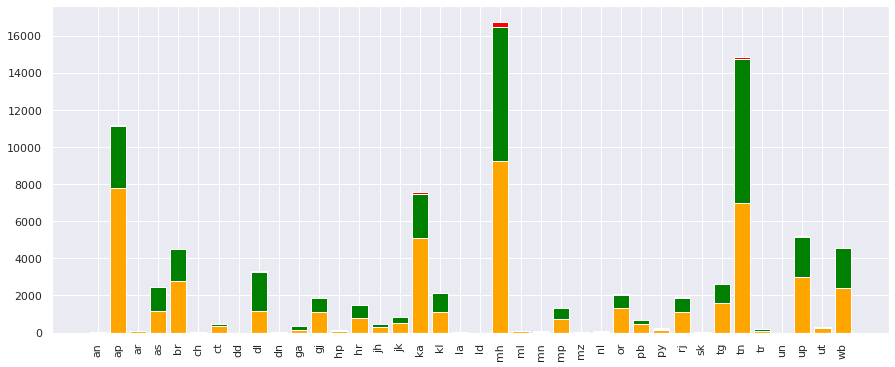

In [158]:
fig = plt.gcf();
fig.set_size_inches(15, 6)
plt.bar(df_.index, df_.Confirmed, color='Orange')
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red')
plt.xticks(rotation = 90);

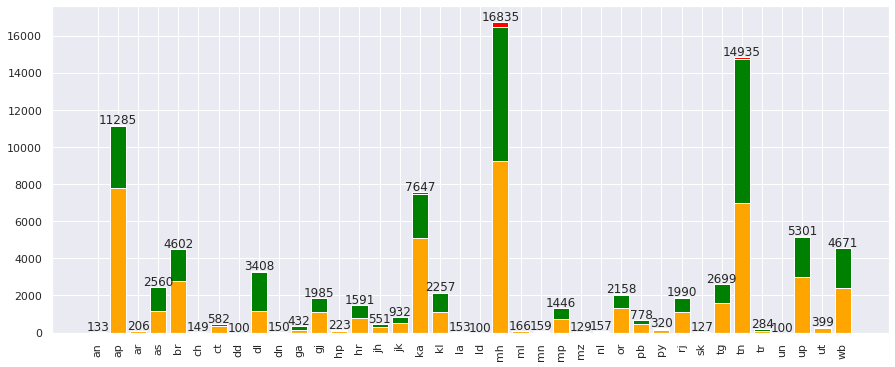

In [159]:
fig = plt.gcf();
fig.set_size_inches(15, 6)
plt.bar(df_.index, df_.Confirmed, color='Orange')
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red')
plt.xticks(rotation = 90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    x = i
    plt.text(x, y, str(y), ha='center');

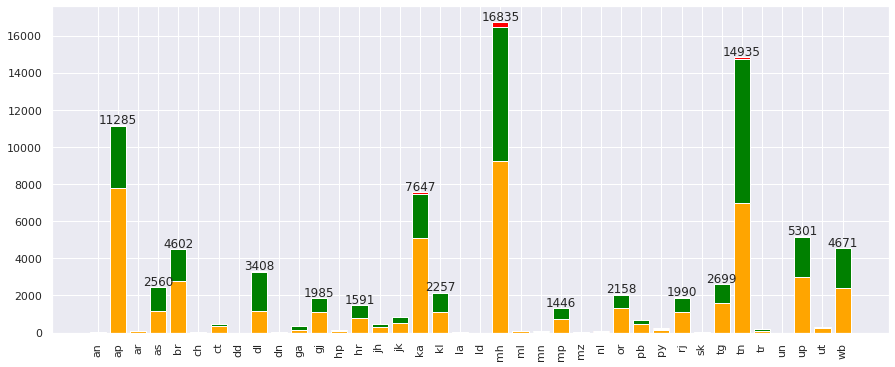

In [160]:
fig = plt.gcf();
fig.set_size_inches(15, 6)
plt.bar(df_.index, df_.Confirmed, color='Orange')
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red')
plt.xticks(rotation = 90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha='center');

### Relative Stacked Bar Plots

In [161]:
df_.head()

status,Confirmed,Recovered,Deceased
an,31,2,0
ap,7813,3320,52
ar,70,36,0
as,1165,1294,1
br,2803,1688,11


In [162]:
df_['Total'] = 0

In [163]:
df_['Total'] = df_.sum(axis = 1)

In [164]:
df_.head()

status,Confirmed,Recovered,Deceased,Total
an,31,2,0,33
ap,7813,3320,52,11185
ar,70,36,0,106
as,1165,1294,1,2460
br,2803,1688,11,4502


In [165]:
df_['ConfirmedFraction'] = df_['Confirmed'] / df_['Total']
df_['RecoveredFraction'] = df_['Recovered'] / df_['Total']
df_['DeceasedFraction'] = df_['Deceased'] / df_['Total']

In [166]:
df_.head()

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
an,31,2,0,33,0.939394,0.060606,0.000000
ap,7813,3320,52,11185,0.698525,0.296826,0.004649
ar,70,36,0,106,0.660377,0.339623,0.000000
as,1165,1294,1,2460,0.473577,0.526016,0.000407
br,2803,1688,11,4502,0.622612,0.374944,0.002443


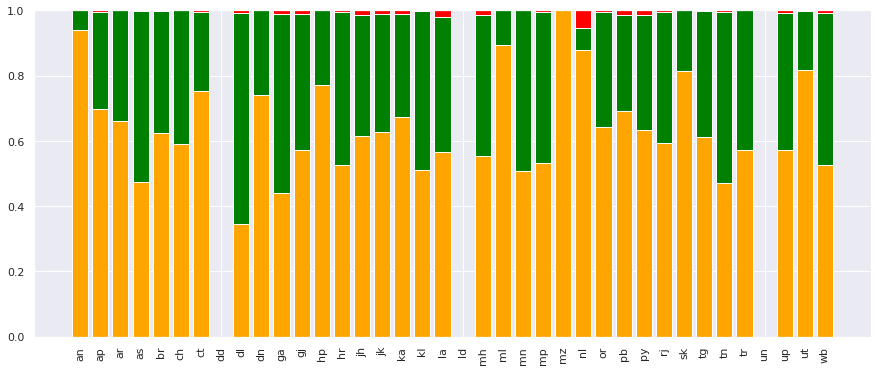

In [167]:
# Compare fractions across the states

fig = plt.gcf();
fig.set_size_inches(15, 6)
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange')
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red')
plt.xticks(rotation = 90);

With the above plot, we can get a great view of data.We can now compare accross the states of the present situation.

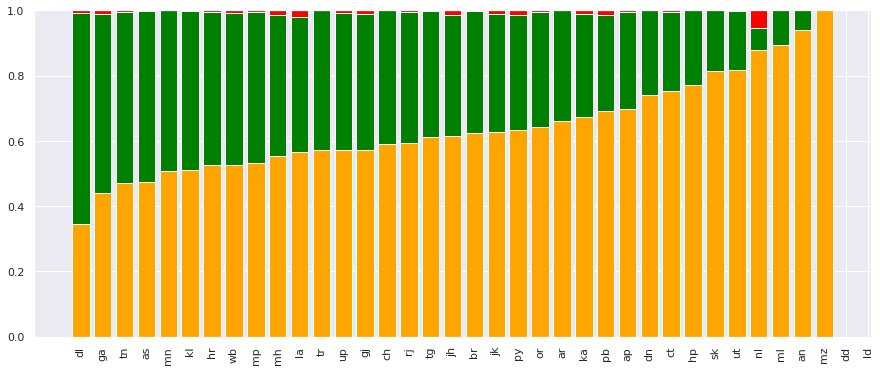

In [168]:
# Sorting the data and plot again the above graph

df_ = df_.sort_values('ConfirmedFraction', ascending=True)

fig = plt.gcf();
fig.set_size_inches(15, 6)
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange')
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red')
plt.xticks(rotation = 90);

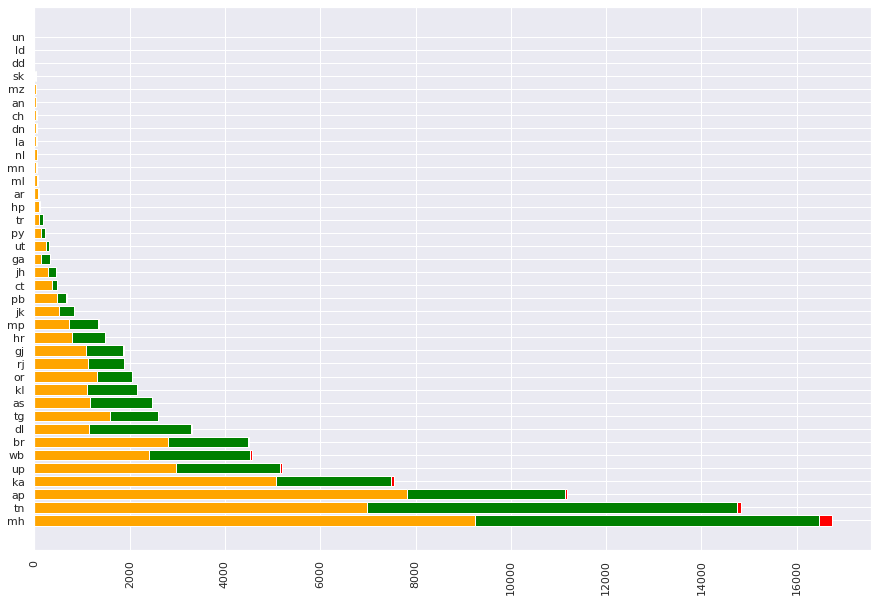

In [169]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15, 10)
plt.barh(df_.index, df_.Confirmed, color='Orange')
plt.barh(df_.index, df_.Recovered, left=df_.Confirmed, color='Green');
plt.barh(df_.index, df_.Deceased, left=df_.Confirmed + df_.Recovered, color='Red')
plt.xticks(rotation = 90);

# for i, val in enumerate(df_.index):
#     y = df_.loc[val, 'Total'] + 100
#     if y > 1000:
#         x = i
#         plt.text(x, y, str(y), ha='center');

## Time-varying composition of data

### Stacked area plots

In [170]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [171]:
df_mh = df[['mh', 'date', 'status']]

In [172]:
df_mh

,mh,date,status
0,14,14-Mar-20,Confirmed
1,0,14-Mar-20,Recovered
2,0,14-Mar-20,Deceased
3,18,15-Mar-20,Confirmed
4,0,15-Mar-20,Recovered
...,...,...,...
397,5714,24-Jul-20,Recovered
398,278,24-Jul-20,Deceased
399,9251,25-Jul-20,Confirmed
400,7227,25-Jul-20,Recovered


In [173]:
df_mh['mh'] = pd.to_numeric(df_mh['mh'])
df_mh['date'] = pd.to_datetime(df_mh['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [174]:
df_mh.head()

,mh,date,status
0,14,2020-03-14,Confirmed
1,0,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,18,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


Now we want a table structure which i am drawing below.

date  | Confirmed  | Recovered  | Deceased

2020-03-14  |  14  |  0  |  0  |

pivoting data actually means reshaping data.It actually reshapes data judging its uniqueness.

In [175]:
df_mh = df_mh.pivot_table(values="mh", index='date', columns='status')

In [176]:
df_mh

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0
...,...,...,...
2020-07-21,8336,246,7188
2020-07-22,10576,280,5552
2020-07-23,9895,298,6484


### Stacked Area Plots

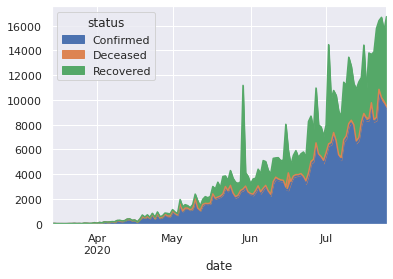

In [177]:
df_mh.plot.area();

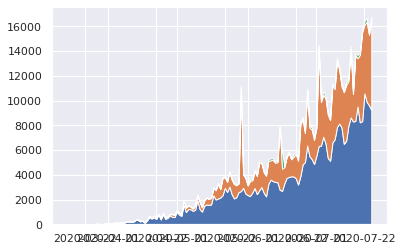

In [178]:
plt.stackplot(df_mh.index, df_mh.Confirmed, df_mh.Recovered, df_mh.Deceased);

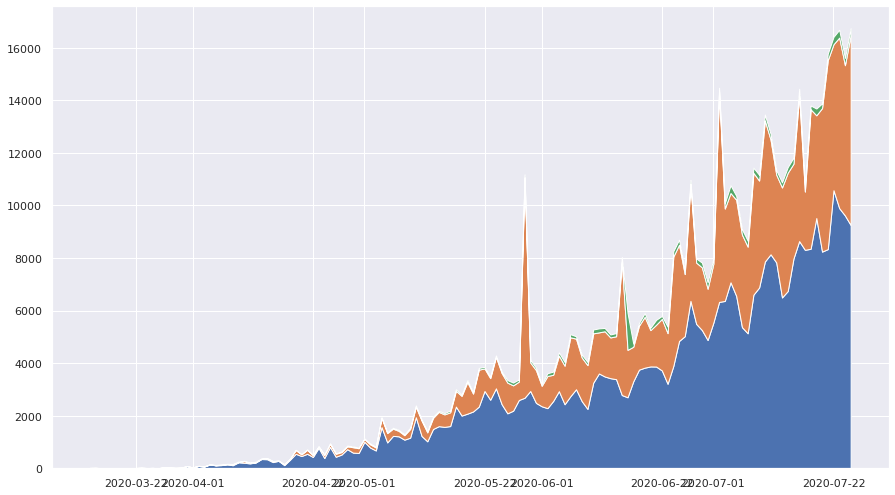

In [179]:
fig = plt.gcf()
fig.set_size_inches(15, 8.5);
plt.stackplot(df_mh.index, df_mh.Confirmed, df_mh.Recovered, df_mh.Deceased);

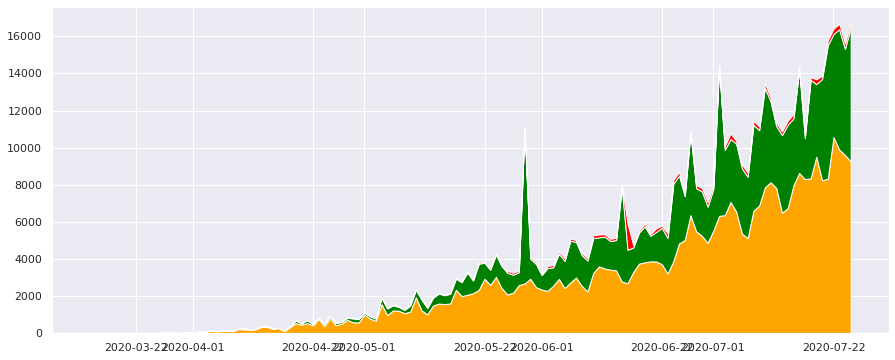

In [180]:
fig = plt.gcf()
fig.set_size_inches(15, 6);
plt.stackplot(df_mh.index, df_mh.Confirmed, df_mh.Recovered, df_mh.Deceased,
              colors=['orange', 'green', 'red']);

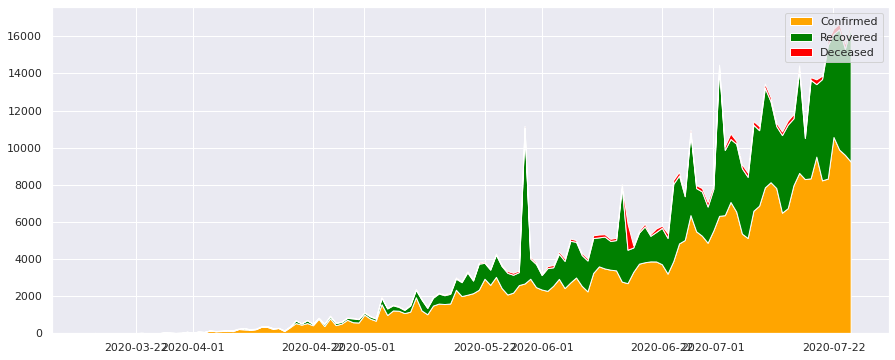

In [181]:
fig = plt.gcf()
fig.set_size_inches(15, 6);
plt.stackplot(df_mh.index, df_mh.Confirmed, df_mh.Recovered, df_mh.Deceased,
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend()

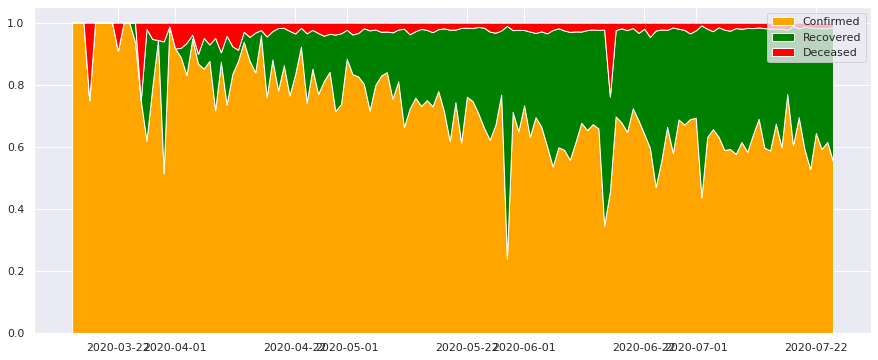

In [182]:
fig = plt.gcf()
fig.set_size_inches(15, 6);
plt.stackplot(df_mh.index, df_mh.Confirmed/df_mh.sum(axis=1),
              df_mh.Recovered/df_mh.sum(axis=1),
              df_mh.Deceased/df_mh.sum(axis=1),
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();

In [183]:
def stacked_area_plot_by_state(state):
    df_state = df[[state, 'date', 'status']]
    df_state[state] = pd.to_numeric(df_state[state])
    df_state['date'] = pd.to_datetime(df_state['date'])

    df_state = df_state.pivot_table(values=state, index='date', columns='status')


    fig = plt.gcf()
    fig.set_size_inches(15, 6);
    plt.stackplot(df_state.index, df_state.Confirmed/df_state.sum(axis=1),
                df_state.Recovered/df_state.sum(axis=1),
                df_state.Deceased/df_state.sum(axis=1),
                labels=['Confirmed', 'Recovered', 'Deceased'],
                colors=['orange', 'green', 'red']);
    plt.legend();                            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


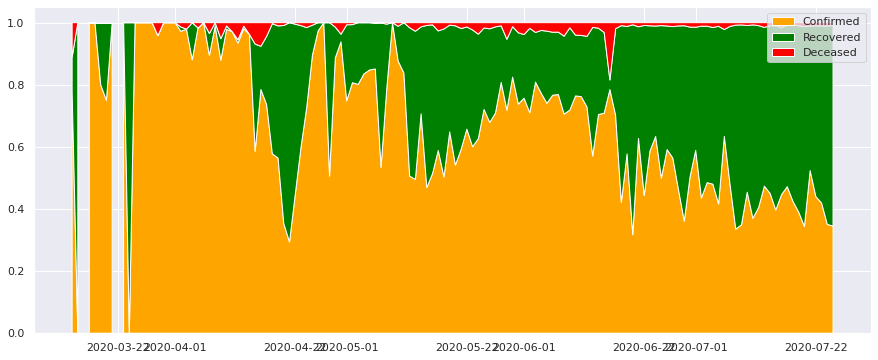

In [184]:
stacked_area_plot_by_state('dl');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


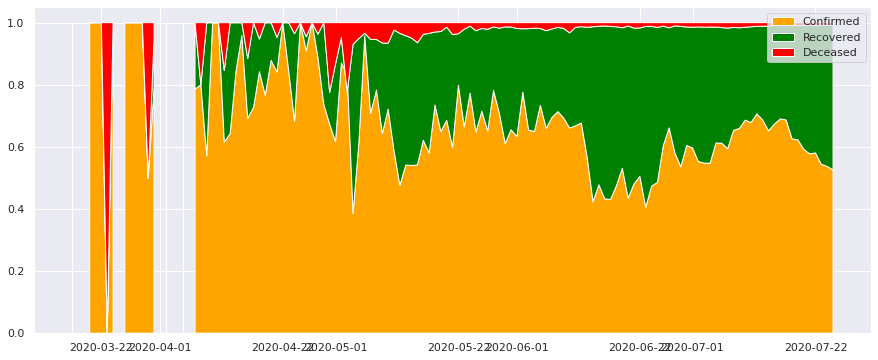

In [185]:
stacked_area_plot_by_state('wb');

# Plotting relationships between data

## Scatter plot

In [186]:
t = sns.load_dataset('tips')

In [187]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


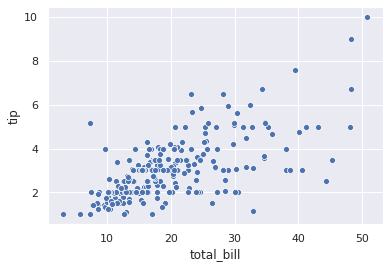

In [188]:
sns.scatterplot(x='total_bill', y='tip', data=t);

In [189]:
t['tip_fraction'] = t['tip']/t['total_bill']

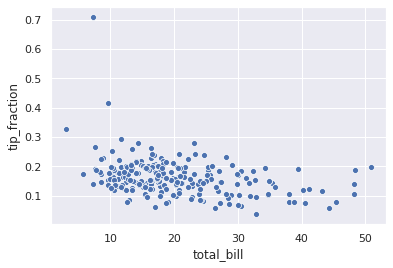

In [190]:
sns.scatterplot(x='total_bill', y='tip_fraction', data=t);

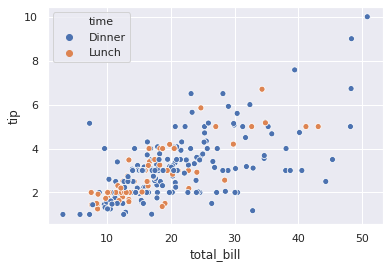

In [191]:
sns.scatterplot(x='total_bill', y='tip',data=t,hue='time');

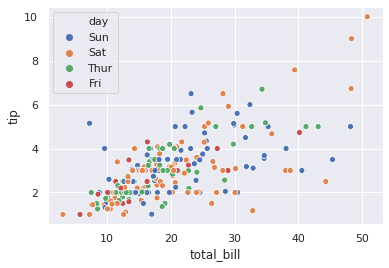

In [192]:
sns.scatterplot(x='total_bill', y='tip',data=t,hue='day');

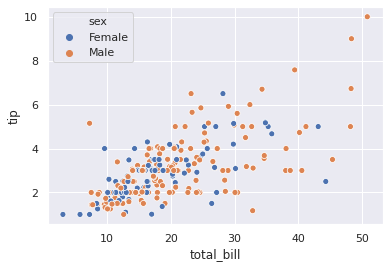

In [193]:
sns.scatterplot(x='total_bill', y='tip',data=t,hue='sex');

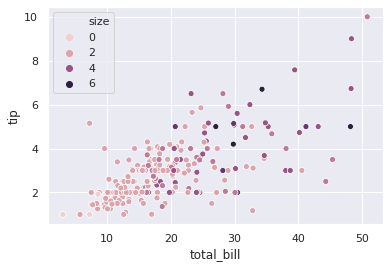

In [194]:
sns.scatterplot(x='total_bill', y='tip',data=t,hue='size');

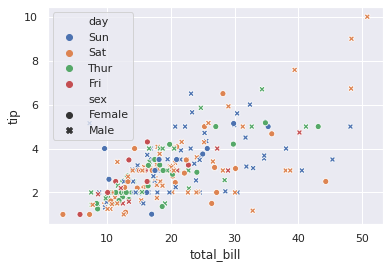

In [195]:
sns.scatterplot(x='total_bill', y='tip',data=t,
                hue='day', style='sex');

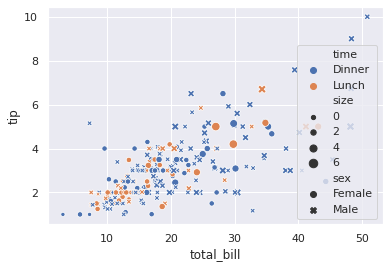

In [196]:
sns.scatterplot(x='total_bill', y='tip',data=t,
                hue='time', style='sex', size='size');

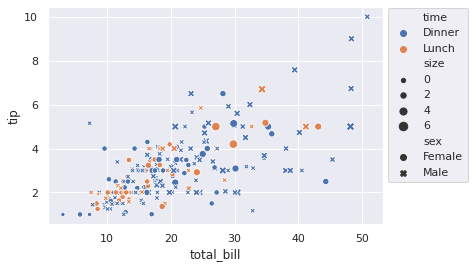

In [197]:
sns.scatterplot(x='total_bill', y='tip',data=t,
                hue='time', style='sex', size='size');

plt.legend(bbox_to_anchor=(1.00, 1.02));

## Reg Plot (Scatter plot extension)

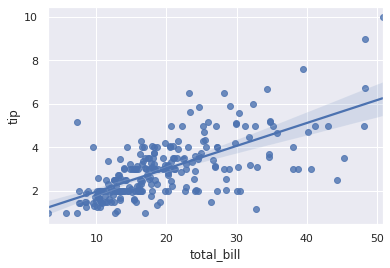

In [198]:
sns.regplot(x='total_bill', y='tip',data=t);

# plt.legend(bbox_to_anchor=(1.00, 1.02));

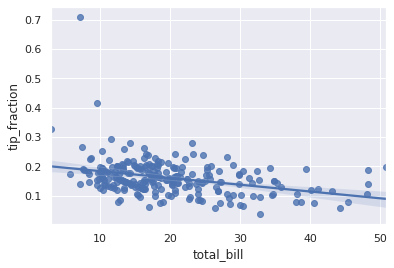

In [199]:
sns.regplot(x='total_bill', y='tip_fraction',data=t);

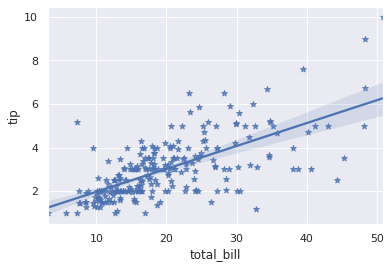

In [200]:
sns.regplot(x='total_bill', y='tip',data=t, marker='*');

In [201]:
d = sns.load_dataset('diamonds')

In [202]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


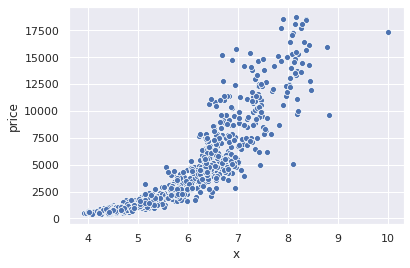

In [203]:
sns.scatterplot('x', 'price', data=d.sample(1000));

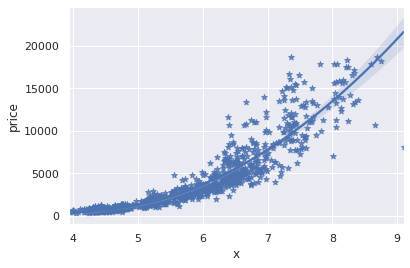

In [204]:
sns.regplot('x', 'price', data=d.sample(1000), order=2, marker='*');

## Bar Plots

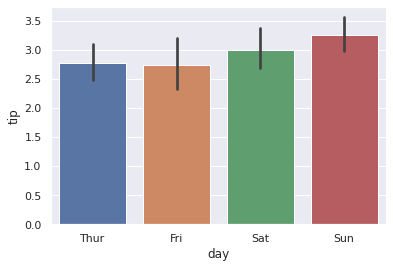

In [205]:
sns.barplot(x='day', y='tip', data=t);

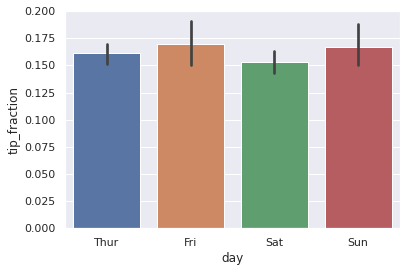

In [206]:
sns.barplot(x='day', y='tip_fraction', data=t);

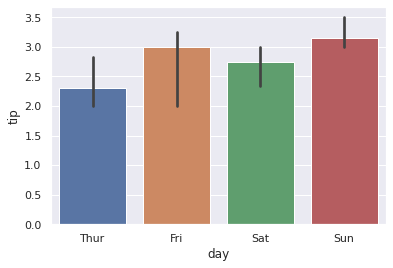

In [207]:
sns.barplot(x='day', y='tip', data=t, estimator=np.median);

In this plot we can also use our own function.

In [208]:
def my_estimator(v):
    return np.percentile(v, 0.25)

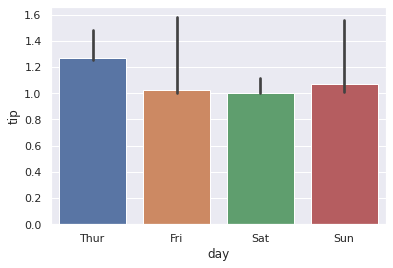

In [209]:
sns.barplot(x='day', y='tip', data=t, estimator=my_estimator);

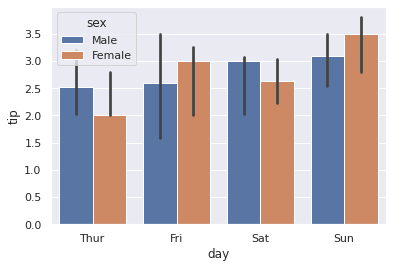

In [210]:
sns.barplot(x='day', y='tip', hue='sex', data=t, estimator=np.median);

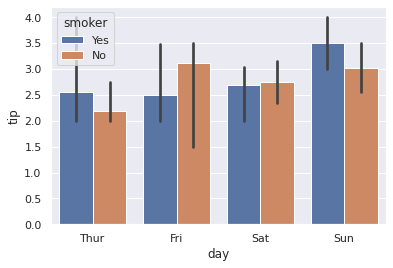

In [211]:
sns.barplot(x='day', y='tip', hue='smoker', data=t, estimator=np.median);

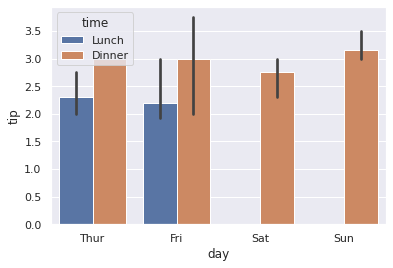

In [212]:
sns.barplot(x='day', y='tip', hue='time', data=t, estimator=np.median);

In [213]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


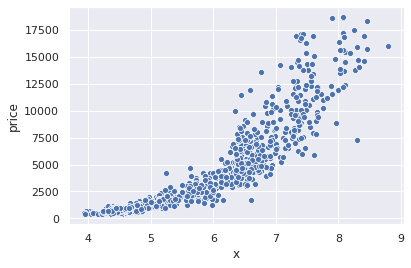

In [214]:
sns.scatterplot('x', 'price', data=d.sample(1000));

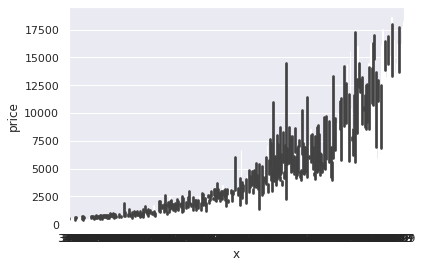

In [215]:
sns.barplot('x', 'price', data=d.sample(1000));

In [216]:
d['x_q'] = pd.cut(d['x'], bins=15)

In [217]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(3.58, 4.296]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(3.58, 4.296]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(3.58, 4.296]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(3.58, 4.296]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(4.296, 5.012]"


In [218]:
d['x_q'].unique()

[(3.58, 4.296], (4.296, 5.012], (5.012, 5.728], (6.444, 7.16], (5.728, 6.444], ..., (-0.0107, 0.716], (7.876, 8.592], (8.592, 9.308], (9.308, 10.024], (10.024, 10.74]]
Length: 11
Categories (11, interval[float64]): [(-0.0107, 0.716] < (3.58, 4.296] < (4.296, 5.012] < (5.012, 5.728] <
                                     ... < (7.876, 8.592] < (8.592, 9.308] <
                                     (9.308, 10.024] < (10.024, 10.74]]

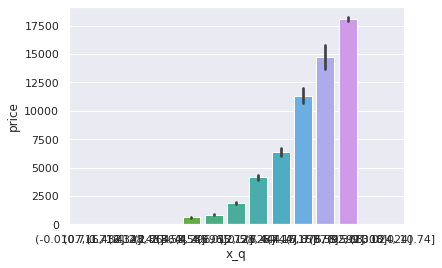

In [219]:
sns.barplot('x_q', 'price', data=d.sample(1000));

In [220]:
d['x_q'] = pd.cut(d['x'], bins=15, labels=False)

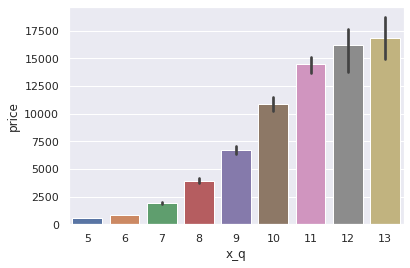

In [221]:
sns.barplot('x_q', 'price', data=d.sample(1000));

## Line Plots

In [222]:
f = sns.load_dataset('fmri')

In [223]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [224]:
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


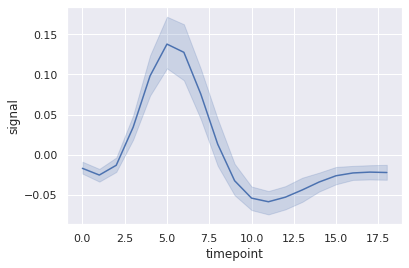

In [225]:
sns.lineplot('timepoint', 'signal', data=f)

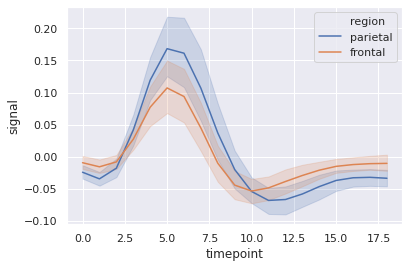

In [226]:
sns.lineplot('timepoint', 'signal', data=f, hue='region');

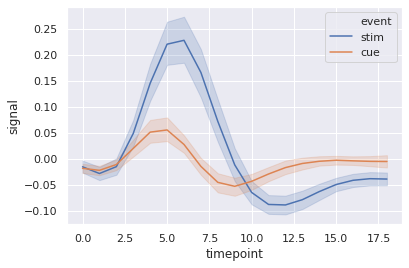

In [227]:
sns.lineplot('timepoint', 'signal', data=f, hue='event');

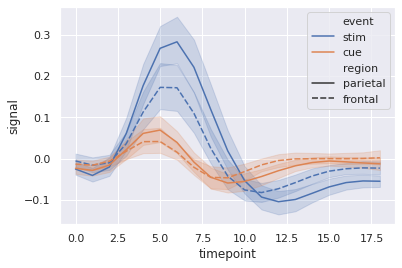

In [228]:
sns.lineplot('timepoint', 'signal', data=f, hue='event', style='region');

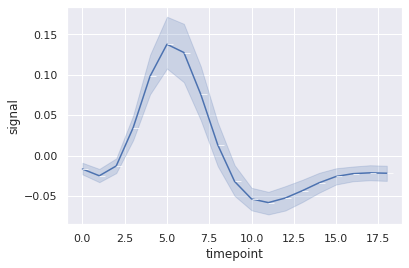

In [229]:
sns.lineplot('timepoint', 'signal', data=f, marker=True);

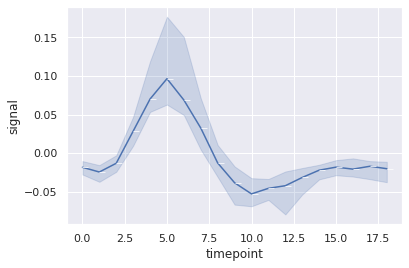

In [230]:
sns.lineplot('timepoint', 'signal', data=f,
             marker=True, estimator=np.median);

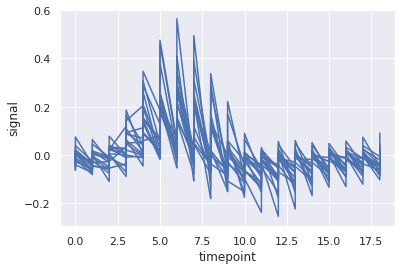

In [231]:
# Plotting multiple lines we need to use units 

sns.lineplot('timepoint', 'signal', data=f, units='subject', estimator=None);

In [232]:
f_ = f[(f.region == 'parietal') & (f.event == 'cue')]

In [233]:
f_.head()

,subject,timepoint,event,region,signal
532,s3,4,cue,parietal,0.058219
533,s6,5,cue,parietal,0.038145
534,s7,5,cue,parietal,-0.008158
535,s8,5,cue,parietal,0.047136
536,s9,5,cue,parietal,0.055847


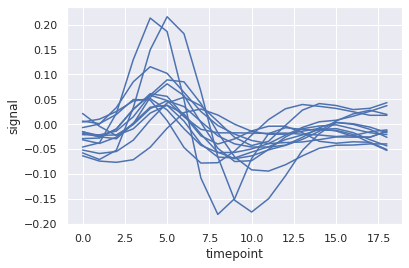

In [234]:
sns.lineplot('timepoint', 'signal', data=f_, units='subject', estimator=None);

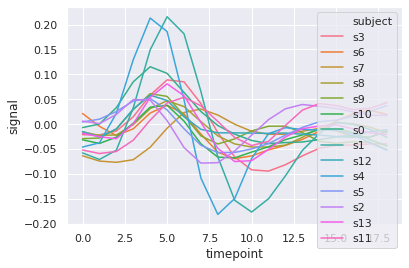

In [235]:
sns.lineplot('timepoint', 'signal', data=f_, hue='subject', estimator=None);

Not only dataframes we  can also plot other datatypes like array and lists

In [236]:
x = np.array([-3,-2,-1,0,1,2,3])
y = np.power(x, 2);

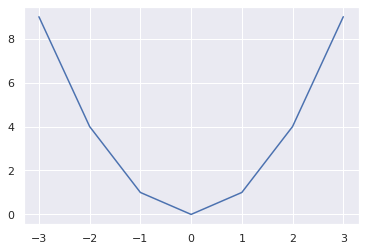

In [237]:
sns.lineplot(x, y);

In [238]:
# x = np.arange(0, 10000000, 1)
# y = np.power(x, 100)

In [239]:
# %%time
# sns.lineplot(x, y)

In [240]:
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date'])
df.drop('tt', axis=1, inplace=True)
df.set_index('date', inplace=True)
df[df['status'] == 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)
df = df.rolling(7).mean()
df.reset_index(inplace=True)

In [241]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We need to change the dataframe format of the above dataframe to a new format describing below.

date|state|confirmed

2020-03-15 | ap | 0

In [242]:
df_ = pd.melt(df, id_vars='date',
              value_vars = list(df.columns).remove('date'),
              var_name= 'state', value_name = 'confirmed')

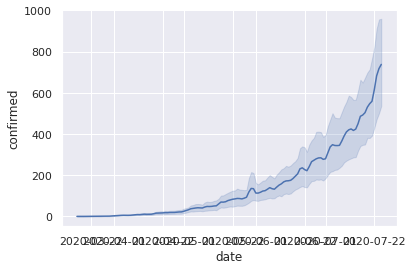

In [243]:
sns.lineplot('date', 'confirmed', data=df_);

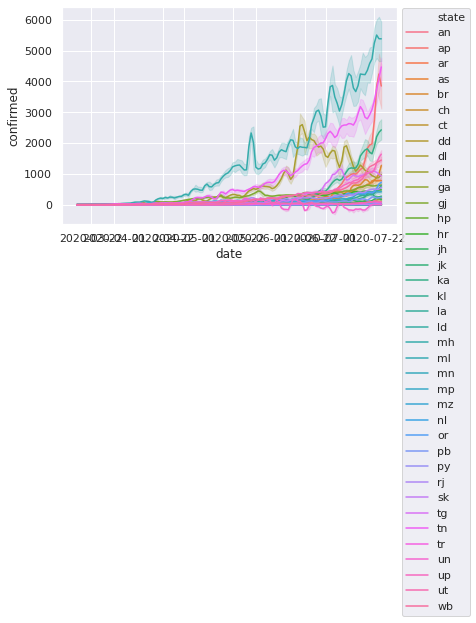

In [244]:
sns.lineplot('date', 'confirmed', data=df_, hue='state');
plt.legend(bbox_to_anchor=(1.00, 1.02));

In [245]:
states = ['mh', 'wb', 'tn', 'ka', 'gj', 'dl']

In [246]:
df_states = df_[df_.state.isin(states)]

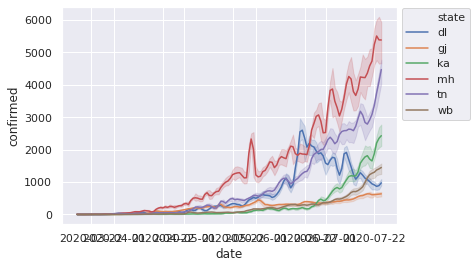

In [247]:
sns.lineplot('date', 'confirmed', hue='state',data=df_states)
plt.legend(bbox_to_anchor=(1.00, 1.02))

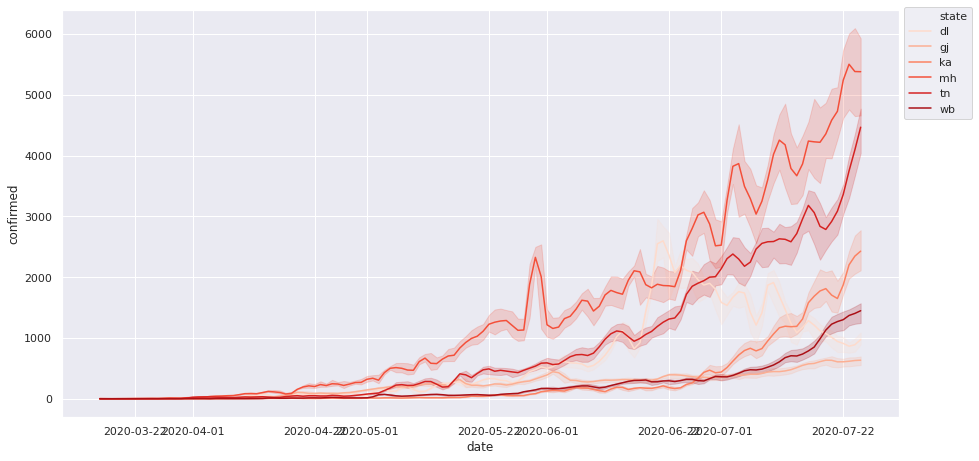

In [248]:
fig = plt.gcf();
fig.set_size_inches(15, 7.5)
sns.lineplot('date', 'confirmed', hue='state',data=df_states,
             palette = 'Reds')
plt.legend(bbox_to_anchor=(1.00, 1.02))

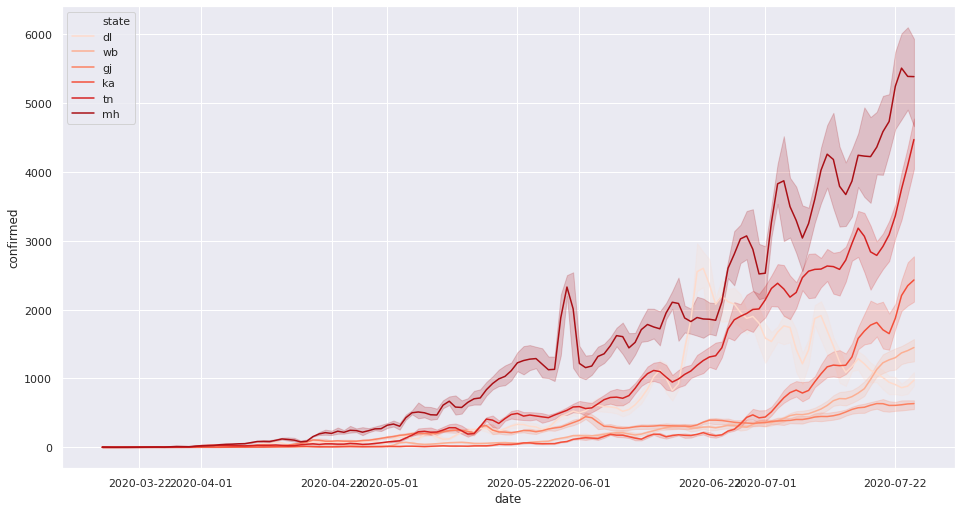

In [249]:
fig = plt.gcf();
fig.set_size_inches(16, 8.5)
sns.lineplot('date', 'confirmed', hue='state',data=df_states,
             palette = 'Reds', hue_order=['dl', 'wb', 'gj', 'ka', 'tn', 'mh'])
# plt.legend(bbox_to_anchor=(1.00, 1.02))

## Heatmap

X[10 x 10]

X(i,j) -> value

In [250]:
x = np.random.rand(10, 10)

In [252]:
x

array([[0.91235502, 0.74276777, 0.99531555, 0.47704878, 0.91772988,
        0.45435609, 0.92522463, 0.070417  , 0.12529028, 0.76615649],
       [0.33389322, 0.78724521, 0.48379969, 0.01858431, 0.13877902,
        0.01056413, 0.58852338, 0.13731004, 0.36154294, 0.9359749 ],
       [0.03309372, 0.0809172 , 0.6471708 , 0.42092988, 0.07709752,
        0.11849989, 0.47537185, 0.7078084 , 0.33906774, 0.64119017],
       [0.46632398, 0.37294367, 0.84478324, 0.34205169, 0.83986917,
        0.09074504, 0.8161963 , 0.08296077, 0.91660424, 0.43876208],
       [0.57977352, 0.81030881, 0.79043243, 0.2968994 , 0.87256179,
        0.70426735, 0.18176362, 0.51658303, 0.46971423, 0.57633296],
       [0.48813481, 0.16462423, 0.24934333, 0.98869737, 0.0911855 ,
        0.18594779, 0.99140138, 0.00309885, 0.96436538, 0.99267568],
       [0.80865122, 0.70681157, 0.13717782, 0.88407949, 0.58413552,
        0.80650606, 0.01026937, 0.49957367, 0.50735444, 0.12419688],
       [0.5081206 , 0.99914809, 0.5186094

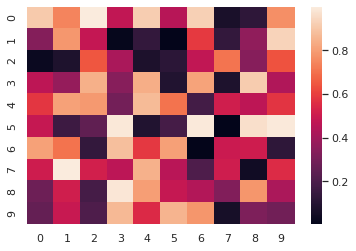

In [251]:
sns.heatmap(x)

In [253]:
fl = sns.load_dataset('flights')

In [254]:
fl.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [255]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


0	1949	January	112

1	1949	February	118

2	1949	March	132

We change our dataset to below dataset.

year        January  February  March

1949           112     118      132
1950

In [256]:
fl_ = fl.pivot(index='year', columns='month', values='passengers')

In [258]:
fl_.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


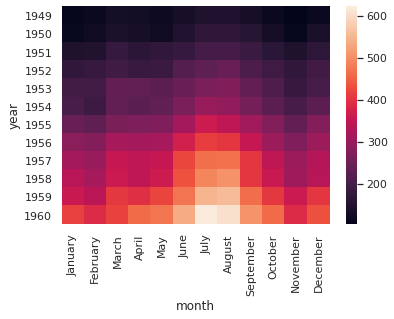

In [260]:
sns.heatmap(fl_)

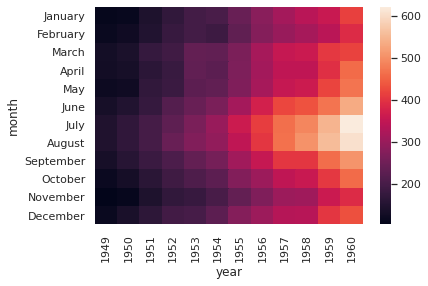

In [261]:
sns.heatmap(fl_.T)

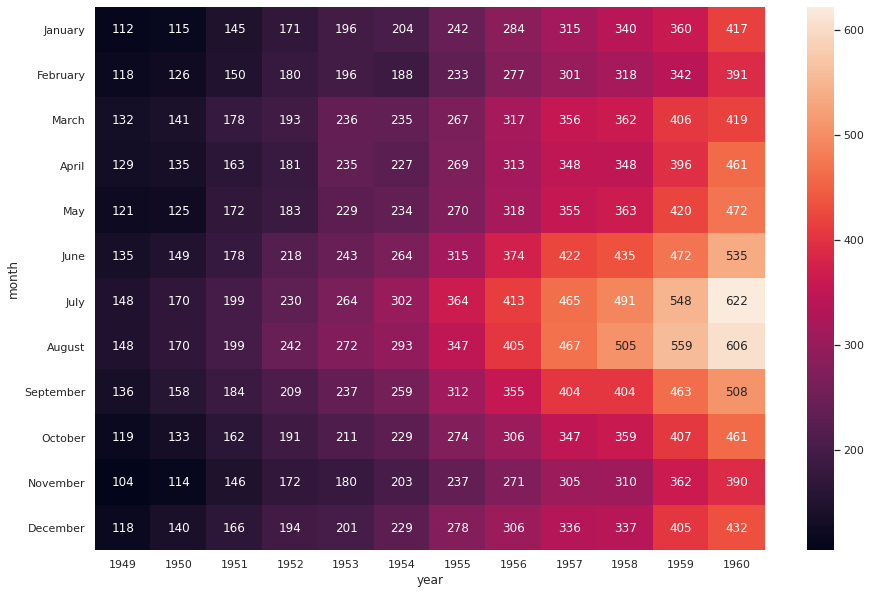

In [264]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt='d')

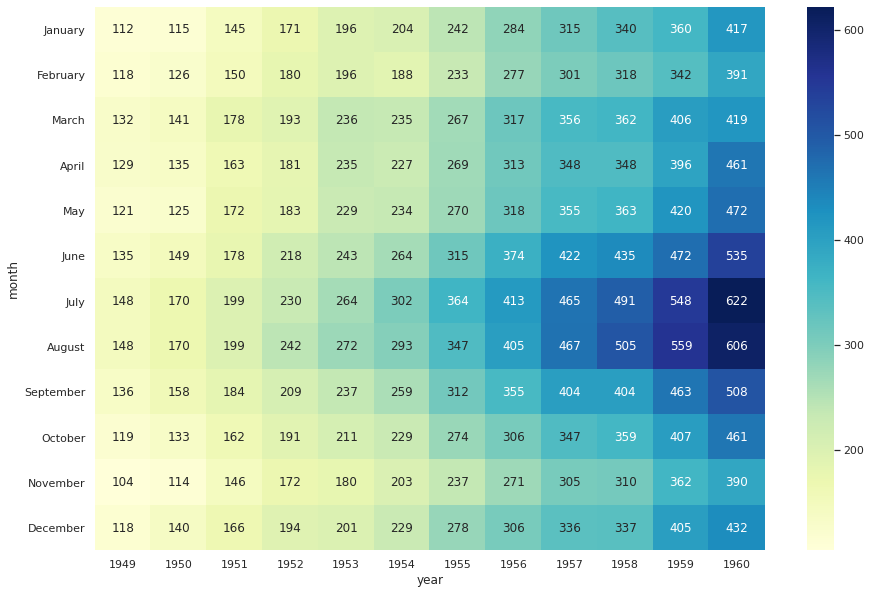

In [265]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt='d', cmap='YlGnBu')

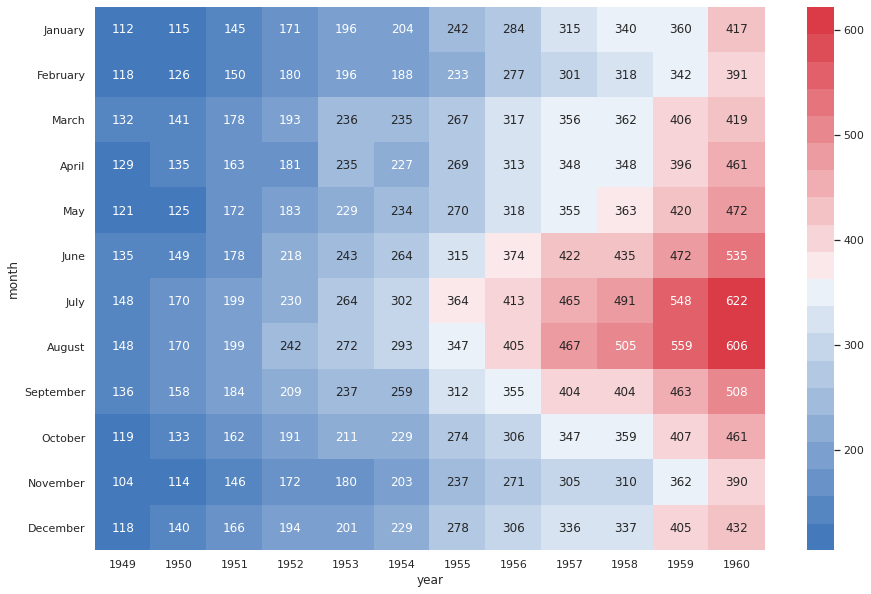

In [270]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt='d', cmap=sns.diverging_palette(250, 10, n=20));

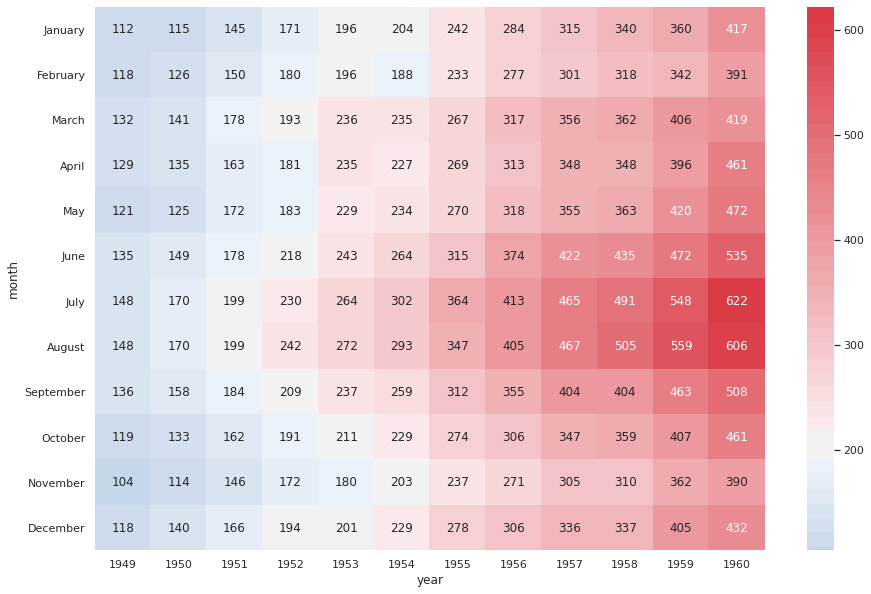

In [275]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt='d', cmap=sns.diverging_palette(250, 10, n=60),
            center=fl_.loc[1954, 'January']);

# Task on visualisation

http://ml-india.org/datasets/